In [1]:
# ================================================================================================================
#
#  In this notebook we show the basic steps for reading in (split) HDF5 data output from the Einstein Toolkit
#
#      note: this works for runs on ONE PROCESSOR -- the way the ET stores HDF5 data when using multiple processors 
#            is (in my experience, yours may be different!) not straightforward to read-in in Python
#            and we have had to develop our own tools for this. This notebook is demonstrative.
#
#    Author: Hayley Macpherson (27/08/2020)
#            hayleyjmacpherson@gmail.com
#
# ================================================================================================================

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import h5py
from matplotlib.ticker import FormatStrFormatter

In [2]:
# ----------------------------------------------
# Set some parameters specific to the simulation
# ----------------------------------------------
resol   = 32               # Resolution of the grid itself
nghosts = 6                # Number of ghost cells in each dimension
res     = resol + nghosts  # Resolution of total grid

dtfac  = 0.5               # Courant factor, ratio of dx to dt
boxL   = 1000.0            # Length of the box
dx     = boxL / res        # Grid spacing
dt     = dtfac * dx        # Time step

its   = np.array([0,2,4,6,8,10]) # Iterations our snapshots are at
times = its * dt                 # Corresponding simulation time

fbase = "FLRW_powerspectrum_it"  # Base name of the output files

In [4]:
# ------------------------------------------
# Get the data and store it in a numpy array
# ------------------------------------------

# First, use a test file to count variables to allocate data space
fname     = fbase + f'{0:06d}.hdf5'
file      = h5py.File(fname, 'r')
keynames  = list(file.keys())[:-1]   # Cut out Parameters & Global Attributes at end
ndats     = len(keynames)            # Number of variables we have
nsteps    = len(its)                 # Number of time steps
file.close()
print(f'We have {ndats} variables, and {nsteps} time steps ')
    
# Get the data for all iterations and variables
print("")
print("Getting data ... ")
print("")
data = np.zeros([len(its),ndats,res,res,res])
for i,it in enumerate(its):
    fname = fbase + f'{it:06d}.hdf5'
    file  = h5py.File(fname, 'r')
    print(f"it = {it}, file = {fname}")
    keylist = list(file.keys())[:-1]
    for j,key in enumerate(keylist):
        print(f"    getting {key}")
        data[i,j,:,:,:] = np.array(file[key])
    file.close()
print("Done")

We have 7 variables, and 6 time steps 

Getting data ... 

it = 0, file = FLRW_powerspectrum_it000000.hdf5
    getting ADMBASE::gxx it=0 tl=0 rl=0
    getting ADMBASE::gxy it=0 tl=0 rl=0
    getting ADMBASE::gxz it=0 tl=0 rl=0
    getting ADMBASE::gyy it=0 tl=0 rl=0
    getting ADMBASE::gyz it=0 tl=0 rl=0
    getting ADMBASE::gzz it=0 tl=0 rl=0
    getting HYDROBASE::rho it=0 tl=0 rl=0
it = 2, file = FLRW_powerspectrum_it000002.hdf5
    getting ADMBASE::gxx it=2 tl=0 rl=0
    getting ADMBASE::gxy it=2 tl=0 rl=0
    getting ADMBASE::gxz it=2 tl=0 rl=0
    getting ADMBASE::gyy it=2 tl=0 rl=0
    getting ADMBASE::gyz it=2 tl=0 rl=0
    getting ADMBASE::gzz it=2 tl=0 rl=0
    getting HYDROBASE::rho it=2 tl=0 rl=0
it = 4, file = FLRW_powerspectrum_it000004.hdf5
    getting ADMBASE::gxx it=4 tl=0 rl=0
    getting ADMBASE::gxy it=4 tl=0 rl=0
    getting ADMBASE::gxz it=4 tl=0 rl=0
    getting ADMBASE::gyy it=4 tl=0 rl=0
    getting ADMBASE::gyz it=4 tl=0 rl=0
    getting ADMBASE::gzz it=4 tl=

Plotting HYDROBASE::rho it=0 tl=0 rl=0


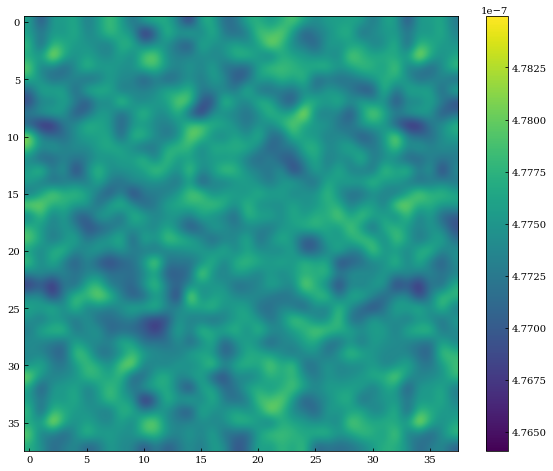

In [12]:
# ----------------
# Plot some data!
# ----------------
ti = 0             # Index of time to look at
di = 6             # Index of variable to look at
try:
    print(f"Plotting {keynames[di]}")
except:
    print(f"ERROR: variable number {di} doesn't exist")

slc = int(res/2)           # Slice to look at in 2D plot
plt.figure(figsize=[10,8])
im=plt.imshow(data[ti,di,:,:,slc],interpolation='bicubic')
plt.colorbar(im);

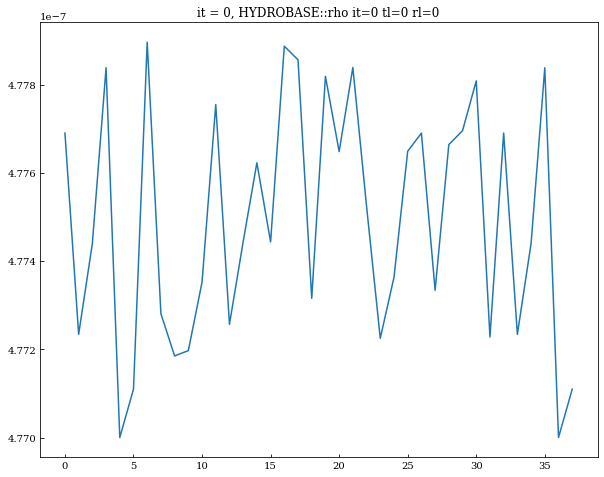

In [16]:
#
# Plot a 1D look at the data as well
#
plt.figure(figsize=[10,8])
plt.plot(data[ti,di,:,slc,slc]);
plt.title(f"it = {its[ti]}, {keynames[di]}");

In [ ]:
#
# < insert interesting science here >
#